In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# ML

In [2]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [4]:
numerical_cols=df.select_dtypes(include=['float64','int64']).columns


In [5]:
numerical_cols=numerical_cols[:-1]

In [6]:
df[numerical_cols]=scaler.fit_transform(df[numerical_cols])

In [7]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.479167,1.0,0.000000,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,1.0,0.50,1.000000,0
1,0.500000,1.0,0.000000,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000,0
2,0.854167,1.0,0.000000,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000,0
3,0.666667,1.0,0.000000,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,1.0,0.25,1.000000,0
4,0.687500,0.0,0.000000,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.666667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.625000,1.0,0.333333,0.433962,0.216895,0.0,0.5,0.709924,1.0,0.000000,1.0,0.00,0.666667,1
1021,0.645833,1.0,0.000000,0.292453,0.301370,0.0,0.0,0.534351,1.0,0.451613,0.5,0.25,1.000000,0
1022,0.375000,1.0,0.000000,0.150943,0.340183,0.0,0.0,0.358779,1.0,0.161290,0.5,0.25,0.666667,0
1023,0.437500,0.0,0.000000,0.150943,0.292237,0.0,0.0,0.671756,0.0,0.000000,1.0,0.00,0.666667,1


In [8]:
df.shape

(1025, 14)

In [9]:
X=df.drop('target',axis=1)
y=df['target']

In [10]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.4,random_state=42)

In [11]:
model=GaussianNB()


In [12]:
model.fit(X_train,y_train)

GaussianNB()

In [14]:
y_pred=model.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,

In [15]:
#accuracy

print(model.score(X_test, y_test))

0.8146341463414634


In [16]:
accuracy_NB=accuracy_score(y_test,y_pred)
print(accuracy_NB)

0.8146341463414634


In [16]:
#Decision tree

In [22]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
model1=DecisionTreeClassifier()

In [20]:
model1.fit(X_train,y_train)

DecisionTreeClassifier()

In [21]:
y_pred=model1.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0])

In [22]:
accuracy_DT=accuracy_score(y_test,y_pred)
print(accuracy_DT)

0.9853658536585366


In [23]:
#Random Forest

In [23]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
model2=RandomForestClassifier()

In [26]:
model2.fit(X_train,y_train)

RandomForestClassifier()

In [27]:
y_pred=model2.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,

In [28]:
accuracy_RF=accuracy_score(y_test,y_pred)
print(accuracy_DT)

0.9853658536585366


In [30]:
#SVM

In [24]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [30]:
from sklearn.svm import SVC

In [31]:
model3=SVC()

In [32]:
model3.fit(X_train,y_train)

SVC()

In [33]:
y_pred=model3.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0])

In [34]:
accuracy_SVM=accuracy_score(y_test,y_pred)
print(accuracy_SVM)

0.8682926829268293


In [37]:
#KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
model4=KNeighborsClassifier(n_neighbors=3)

In [25]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [38]:
model4.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [39]:
y_pred=model4.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0])

In [40]:
accuracy_KNN=accuracy_score(y_test,y_pred)
print(accuracy_KNN)

0.9317073170731708


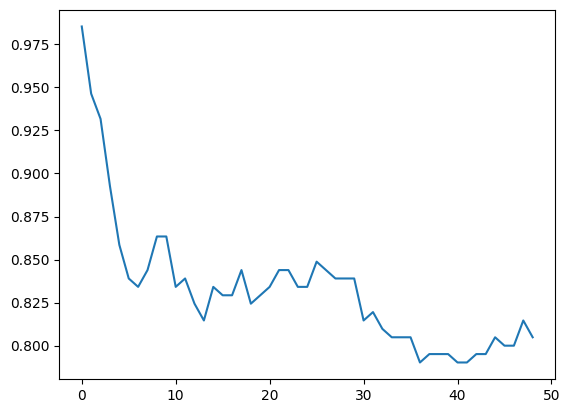

In [41]:
acc=[]
for i in range(1,50):
    m=KNeighborsClassifier(n_neighbors=i)
    m.fit(X_train,y_train)
    y_pred=m.predict(X_test)
    acc.append(accuracy_score(y_test,y_pred))
plt.plot(acc)

In [42]:
acc[3]

0.8926829268292683

In [43]:
model4=KNeighborsClassifier(n_neighbors=3)
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)
model4.fit(X_train,y_train)
y_pred=model4.predict(X_test)
accuracy_KNN=accuracy_score(y_test,y_pred)

In [47]:
#Logistic Resgression

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
model5=LogisticRegression()

In [46]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

In [47]:
model5.fit(X_train,y_train)

LogisticRegression()

In [48]:
y_pred=model5.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,

In [49]:
accuracy_LR=accuracy_score(y_test,y_pred)
print(accuracy_LR)

0.8181818181818182


In [54]:
#plot

In [50]:
y_plot=[accuracy_NB,accuracy_DT,accuracy_RF,accuracy_SVM,accuracy_KNN,accuracy_LR]
X_plot=['NB','DT','RF','SVM','KNN','LR']


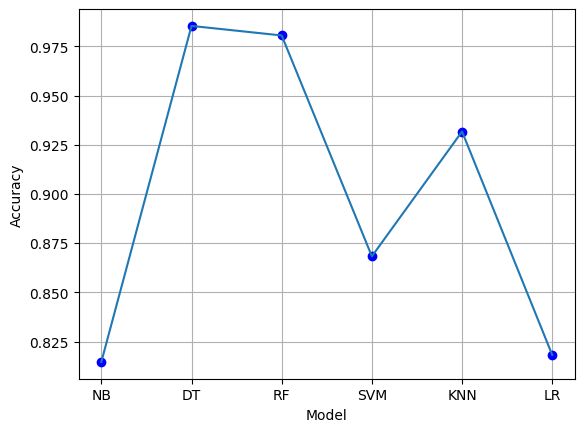

In [51]:
plt.plot(X_plot, y_plot, 'o', color='blue')
plt.plot(X_plot, y_plot)
plt.grid(True)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

In [52]:
with open("NB_model","wb") as handler1:
    pickle.dump(model,handler1)


In [53]:
with open("DT_model","wb") as handler2:
    pickle.dump(model1, handler2)

In [54]:
with open("RF_model","wb") as handler3:
    pickle.dump(model2,handler3)

In [55]:
with open("SVM_model","wb") as handler4:
    pickle.dump(model3,handler4)

In [56]:
with open("KNN_model","wb") as handler5:
    pickle.dump(model4,handler5)

In [57]:
with open("LR_model","wb") as handler6:
    pickle.dump(model5,handler6)



# DL

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [59]:
dl_model = Sequential()
dl_model.add(Dense(500, input_dim=13, activation='relu'))
dl_model.add(Dense(100, activation='relu'))
dl_model.add(Dense(50, activation='relu'))
dl_model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [60]:
dl_model.compile(optimizer='adam',
         loss='binary_crossentropy',
         metrics=['accuracy'])

dl_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.7492 - loss: 0.6150
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8333 - loss: 0.3752
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8669 - loss: 0.3704
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8513 - loss: 0.3406
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8778 - loss: 0.3103
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8921 - loss: 0.2925
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9042 - loss: 0.2643
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8856 - loss: 0.2727
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8825 - loss: 0.2565
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8954 - loss: 0.2416
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9157 - loss: 0.2157
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

In [62]:
y_pred_dl = dl_model.predict(X_test)
y_pred_dl = (y_pred_dl > 0.5) #converting into binary 1 and 0


cm = confusion_matrix(y_test,y_pred_dl)
print("Confusion Matrix: ")
print(cm)

cr = classification_report(y_test,y_pred_dl)
print("Classification Report: ")
print(cr)

acc = accuracy_score(y_test,y_pred_dl)
print("Accuracy: ",acc)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step
Confusion Matrix: 
[[159   0]
 [  6 143]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       159
           1       1.00      0.96      0.98       149

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308

Accuracy:  0.9805194805194806


In [63]:
with open("DL_model","wb") as handler7:
    pickle.dump(dl_model,handler7)

# QML

In [11]:
!pip install qiskit==1.4.2
!pip install qiskit-machine-learning
!pip install qiskit-aer
!pip install qiskit-algorithms
from IPython import display
display.clear_output()

In [12]:
!pip list | grep qiskit

qiskit                                1.4.2
qiskit-aer                            0.17.0
qiskit-algorithms                     0.3.1
qiskit-machine-learning               0.8.2


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from qiskit import QuantumCircuit
from qiskit.primitives import Sampler
from qiskit.result import QuasiDistribution
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [66]:
def qiskit_qml_predict(X_data):
    preds = []
    sampler = Sampler()

    for x in X_data.values: # Iterate through the numerical values of X_data
        qc = QuantumCircuit(8)
        for i in range(8):
            qc.ry(float(x[i]), i) # Convert x[i] to float explicitly

        for i in range(7):
            qc.cx(i, i + 1)

        qc.measure_all()

        result = sampler.run([qc]).result()
        output: QuasiDistribution = result.quasi_dists[0]

        # Convert integer keys to bitstrings before counting '1's
        high_risk_prob = sum([v for k, v in output.items() if bin(k).count('1') >= 1])
        preds.append(1 if high_risk_prob > 0.4 else 0)

    return np.array(preds)

In [67]:
#runniing model
y_train_pred = qiskit_qml_predict(X_train)
y_test_pred = qiskit_qml_predict(X_test)

<ipython-input-66-4414fd20dfe5>:3: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


In [68]:
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("Classification Report (Train):")
print(classification_report(y_train, y_train_pred))
print("Accuracy:", accuracy_score(y_train, y_train_pred))

Confusion Matrix:
[[176 221]
 [154 269]]
Classification Report (Train):
              precision    recall  f1-score   support

           0       0.53      0.44      0.48       397
           1       0.55      0.64      0.59       423

    accuracy                           0.54       820
   macro avg       0.54      0.54      0.54       820
weighted avg       0.54      0.54      0.54       820

Accuracy: 0.5426829268292683


In [69]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("Classification Report (Test):")
print(classification_report(y_test, y_test_pred))
print("Accuracy:", accuracy_score(y_test, y_test_pred))

Confusion Matrix:
[[47 55]
 [44 59]]
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.52      0.46      0.49       102
           1       0.52      0.57      0.54       103

    accuracy                           0.52       205
   macro avg       0.52      0.52      0.52       205
weighted avg       0.52      0.52      0.52       205

Accuracy: 0.5170731707317073


In [28]:
'''#setting input params and weights
feature_dim = X_train.shape[1]

input_params = ParameterVector("x",feature_dim)
weight_params = ParameterVector("w",
                                RealAmplitudes(feature_dim, reps=1,entanglement='linear').num_parameters)'''

In [29]:
'''#defining the quantum circuit
qc = QuantumCircuit(feature_dim)
for i in range(feature_dim):
    qc.ry(input_params[i],i)
qc.compose(RealAmplitudes(feature_dim, reps=1, entanglement='linear').assign_parameters(weight_params),inplace=True)'''

In [30]:
'''#define the Quantum Neural Network (qnn)
qnn = EstimatorQNN(
    circuit=qc,
    input_params=input_params,
    weight_params=weight_params,
)'''

<ipython-input-30-7767aa163fd3>:2: DeprecationWarning: V1 Primitives are deprecated as of qiskit-machine-learning 0.8.0 and will be removed no sooner than 4 months after the release date. Use V2 primitives for continued compatibility and support.
  qnn = EstimatorQNN(


In [31]:
'''qml_classifer = NeuralNetworkClassifier(
    neural_network = qnn,
    optimizer = COBYLA(maxiter=100)
)'''

In [32]:
'''qml_classifer.fit(X_train,y_train)'''

In [35]:
'''y_pred_qml = qml_classifer.predict(X_test)

cm = confusion_matrix(y_test,y_pred_qml)
print("Confusion Matrix: ")
print(cm)

cr = classification_report(y_test,y_pred_qml)
print("Classification Report: ")
print(cr)

acc = accuracy_score(y_test,y_pred_qml)
print("Accuracy: ",acc)'''

Confusion Matrix: 
[[  0 102]
 [  0 103]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       102
           1       0.50      1.00      0.67       103

    accuracy                           0.50       205
   macro avg       0.25      0.50      0.33       205
weighted avg       0.25      0.50      0.34       205

Accuracy:  0.5024390243902439


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
'''with open("QML_model","wb") as handler8:
    pickle.dump(qml_classifer,handler8)'''